Processing London...


Iterations..: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [12:14<00:00, 14.68s/it]


[2.3037872643007117e-05, 2.3169485765294164e-05, 2.3075070582876504e-05, 2.3162212482082418e-05, 2.3283442020250738e-05]
[6.262219155106793e-06, 6.262219155106794e-06, 6.262219155106794e-06, 6.262219155106794e-06, 6.262219155106795e-06]
[0.00017006255485080244, 0.00016649749810210545, 0.00016927797309017857, 0.00016897999023387164, 0.00016760430055882836]
[1.2524438310213593e-06, 1.2524438310213593e-06, 1.2524438310213593e-06, 1.2524438310213593e-06, 1.2524438310213591e-06]
[6.262219155106793e-06, 6.262219155106794e-06, 6.262219155106794e-06, 6.262219155106794e-06, 6.262219155106795e-06]
[1.6565384801244466e-05, 1.6312858834544157e-05, 1.657966008947546e-05, 1.6739721204076294e-05, 1.6874593216627775e-05]
[9.889087749106144e-05, 9.802593622832596e-05, 9.721442923807973e-05, 9.525602137262956e-05, 9.568879609641684e-05]
[1.0388703929524453e-05, 1.0733932173772951e-05, 1.1064775907844427e-05, 1.091564438917544e-05, 1.122962012957601e-05]
[1.8786657465320382e-05, 1.8786657465320382e-05, 1

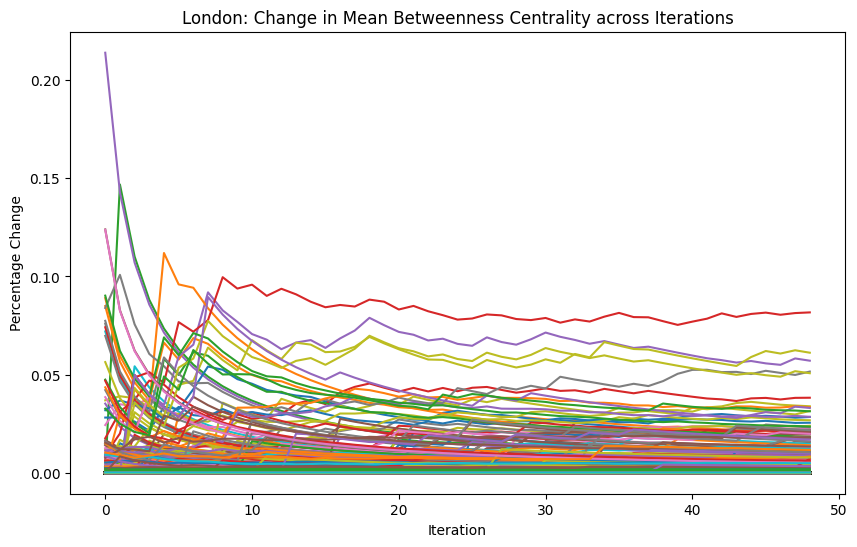

len(overall_mean_bc_per_node), len(G.nodes()) : 798442 798442
Finished processing all cities.


In [6]:
import copy
import os
import pickle
import time
import glob
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import sys

sys.path.append("../..")
import config
from urbanscales.io.road_network import RoadNetwork
from urbanscales.preprocessing.prep_network import Scale
from urbanscales.preprocessing.prep_speed import ScaleJF
from urbanscales.preprocessing.tile import Tile
import pandas as pd
from tqdm import tqdm

from smartprint import smartprint as sprint
from slugify import slugify

import networkx as nx
import matplotlib.pyplot as plt
import random
import tqdm
import pickle

rn_city_wise_tz_code = {
    # "Singapore": "Asia/Singapore",
    # "Zurich": "Europe/Zurich",
    # "Mumbai": "Asia/Kolkata",
    # "Auckland": "Pacific/Auckland",
    # "Istanbul": "Europe/Istanbul",
    # "MexicoCity": "America/Mexico_City",
    # "Bogota": "America/Bogota",
    # "NewYorkCity": "America/New_York",
    # "Capetown": "Africa/Johannesburg",
    "London": "Europe/London"
}

K = 2
iterations = 50
num_random_nodes = 2000

for city, _ in rn_city_wise_tz_code.items():
    print(f"Processing {city}...")

    # Assuming the Scale.get_object method works for every city
    G = RoadNetwork.get_object(city).G_osm

    initial_bc = nx.betweenness_centrality(G, k=K)
    all_nodes = list(initial_bc.keys())
    random_nodes = random.sample(list(initial_bc.keys()), num_random_nodes)
    

    # Dictionary to store the mean betweenness centrality values for each node up to each iteration
    mean_values_per_node = {node: [] for node in all_nodes}

    for i in tqdm.tqdm(range(iterations), desc="Iterations.."):
        bc = nx.betweenness_centrality(G, k=K)
        for node in all_nodes:
            if i == 0:
                current_mean = bc[node]
            else:
                current_mean = (mean_values_per_node[node][-1] * i + bc[node]) / (i + 1)
            mean_values_per_node[node].append(current_mean)

    # Compute the percentage change in mean values across iterations for each node
    percentage_changes_per_node = {node: [] for node in all_nodes}
    
    plt.figure(figsize=(10, 6))
    for node in random_nodes:
        mean_values = mean_values_per_node[node]
        percentage_changes = []
        for i in range(1, len(mean_values)):
            if mean_values[i-1] != 0:
                percentage_change = ((mean_values[i] - mean_values[i-1]) / mean_values[i-1]) * 100
            else:
                percentage_change = np.nan

             
            percentage_changes.append(mean_values[i])
            if i == 10:
                print ( mean_values[-5:])
        percentage_changes_per_node[node] = mean_values[i]

        # Plot the percentage change in mean values for the current node
 
        plt.plot(percentage_changes) # , label=f'Node {node}', marker='o')

    # plt.ylim(-100, 100)
    # plt.yscale("log")
    plt.xlabel('Iteration')
    plt.ylabel('Percentage Change')
    plt.title( city + ': Change in Mean Betweenness Centrality across Iterations')        
    plt.show()

    # Save mean betweenness centrality results for the city to a pickle file
    overall_mean_bc_per_node = {node: sum(values) / len(values) for node, values in mean_values_per_node.items()}
    sprint(len(overall_mean_bc_per_node), len(G.nodes()))
    with open(os.path.join(config.BASE_FOLDER, config.network_folder, \
                               city + "_mean_betweenness_centrality.pkl"), "wb") as f:
        pickle.dump(overall_mean_bc_per_node, f)

print("Finished processing all cities.")

In [ ]:
import copy
import os
import pickle
import time
import glob
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import sys

sys.path.append("../..")
import config
from urbanscales.io.road_network import RoadNetwork
from urbanscales.preprocessing.prep_network import Scale
from urbanscales.preprocessing.prep_speed import ScaleJF
from urbanscales.preprocessing.tile import Tile
import pandas as pd
from tqdm import tqdm

from smartprint import smartprint as sprint
from slugify import slugify

import networkx as nx
import matplotlib.pyplot as plt
import random
import tqdm
import pickle

rn_city_wise_tz_code = {
    # "Singapore": "Asia/Singapore",
    # "Zurich": "Europe/Zurich",
    # "Mumbai": "Asia/Kolkata",
    # "Auckland": "Pacific/Auckland",
    # "Istanbul": "Europe/Istanbul",
    # "MexicoCity": "America/Mexico_City",
    # "Bogota": "America/Bogota",
    # "NewYorkCity": "America/New_York",
    # "Capetown": "Africa/Johannesburg",
    "London": "Europe/London"
}

K = 20
iterations = 10
num_random_nodes = 200

for city, _ in rn_city_wise_tz_code.items():
    print(f"Processing {city}...")

    # Assuming the Scale.get_object method works for every city
    # G = RoadNetwork.get_object(city).G_osm

    initial_bc = nx.betweenness_centrality(G, k=K)
    all_nodes = list(initial_bc.keys())
    random_nodes = random.sample(list(initial_bc.keys()), num_random_nodes)
    

    # Dictionary to store the mean betweenness centrality values for each node up to each iteration
    mean_values_per_node = {node: [] for node in all_nodes}

    for i in tqdm.tqdm(range(iterations), desc="Iterations.."):
        bc = nx.betweenness_centrality(G, k=K)
        for node in all_nodes:
            if i == 0:
                current_mean = bc[node]
            else:
                current_mean = (mean_values_per_node[node][-1] * i + bc[node]) / (i + 1)
            mean_values_per_node[node].append(current_mean)

    # Compute the percentage change in mean values across iterations for each node
    percentage_changes_per_node = {node: [] for node in all_nodes}
    
    plt.figure(figsize=(10, 6))
    for node in random_nodes:
        mean_values = mean_values_per_node[node]
        percentage_changes = []
        for i in range(1, len(mean_values)):
            # if mean_values[i-1] != 0:
            #     percentage_change = ((mean_values[i] - mean_values[i-1]) / mean_values[i-1]) * 100
            # else:
            #     percentage_change = np.nan

             
            percentage_changes.append(mean_values[i])
        percentage_changes_per_node[node] = mean_values[i]

        # Plot the percentage change in mean values for the current node
 
        plt.plot(percentage_changes) # , label=f'Node {node}', marker='o')

    # plt.ylim(-100, 100)
    # plt.yscale("log")
    plt.xlabel('Iteration')
    plt.ylabel('Percentage Change')
    plt.title( city + ': Change in Mean Betweenness Centrality across Iterations')        
    plt.show()

    # Save mean betweenness centrality results for the city to a pickle file
    overall_mean_bc_per_node = {node: sum(values) / len(values) for node, values in mean_values_per_node.items()}
    sprint(len(overall_mean_bc_per_node), len(G.nodes()))
    with open(os.path.join(config.BASE_FOLDER, config.network_folder, \
                               city + "_mean_betweenness_centrality.pkl"), "wb") as f:
        pickle.dump(overall_mean_bc_per_node, f)

print("Finished processing all cities.")

Processing London...


Iterations..:   0%|                                                                                                                                                                                              | 0/10 [00:00<?, ?it/s]

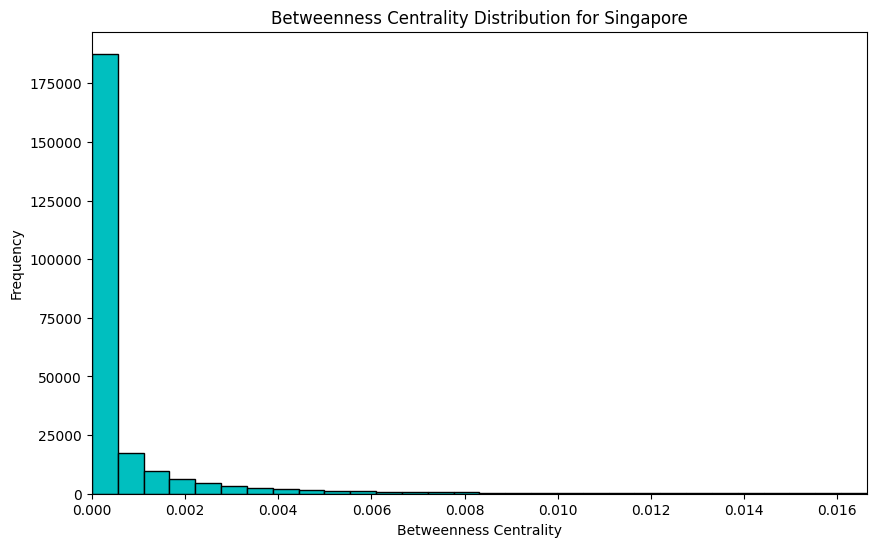

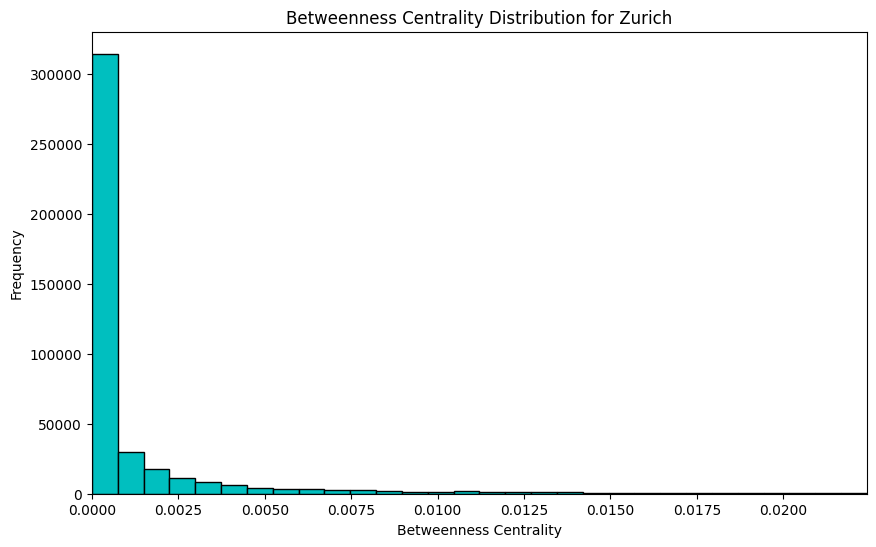

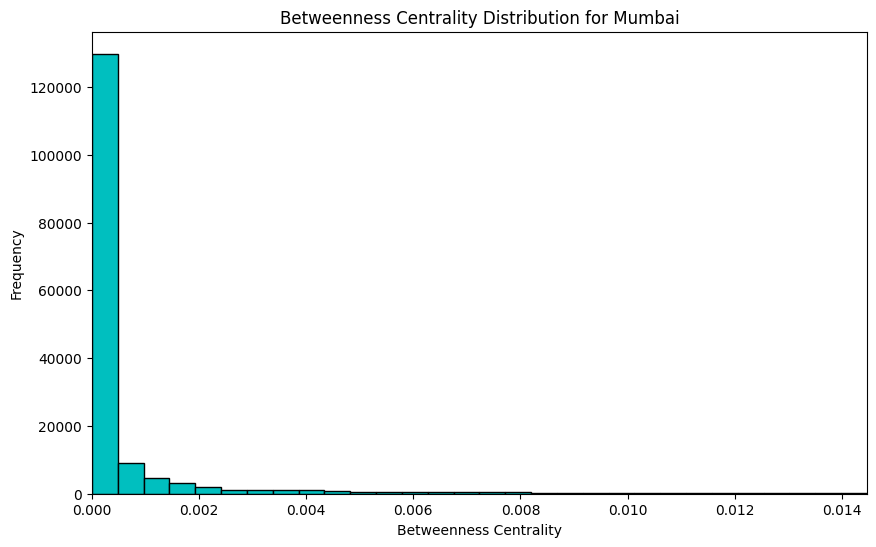

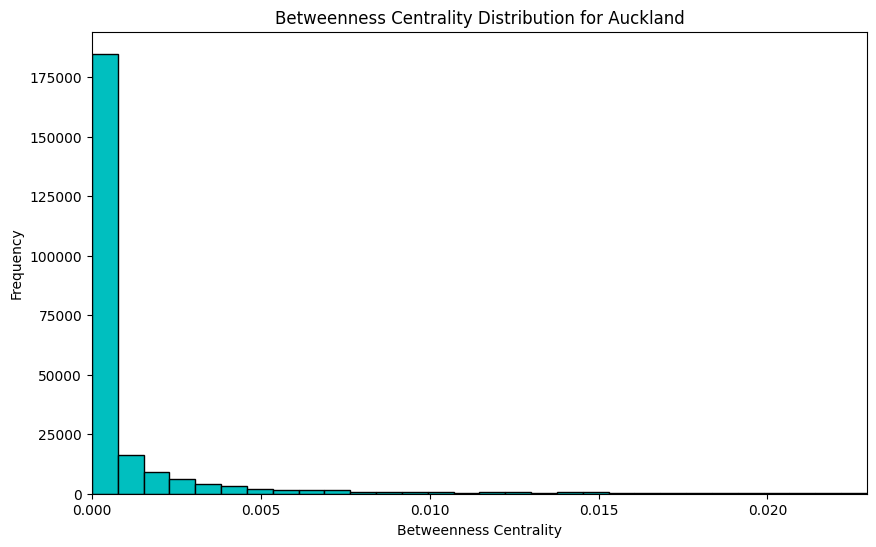

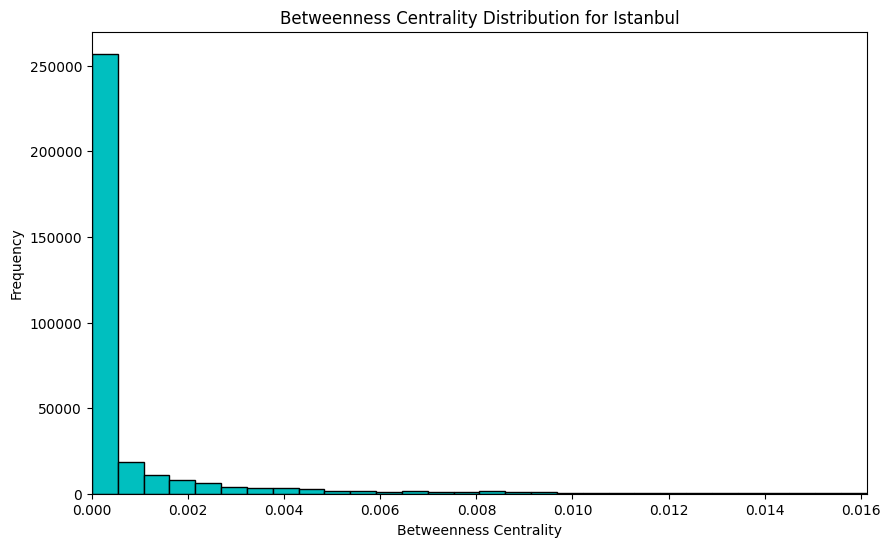

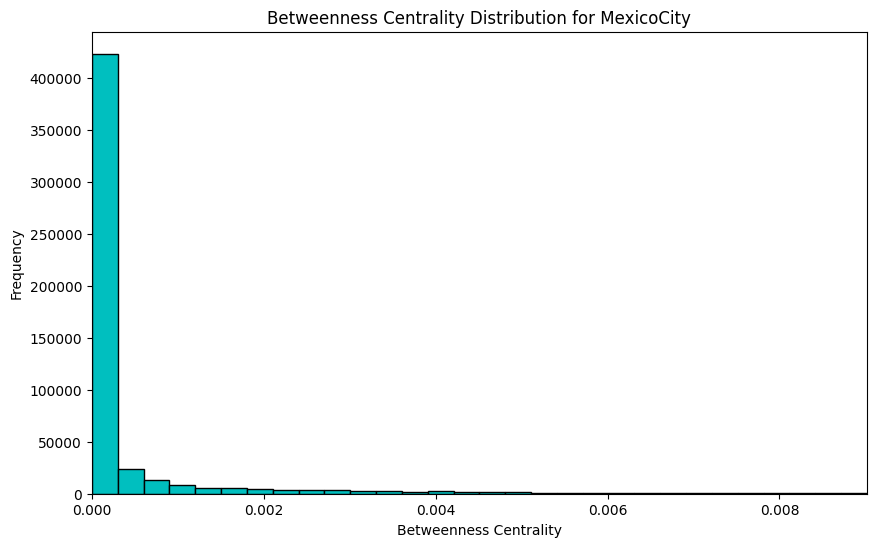

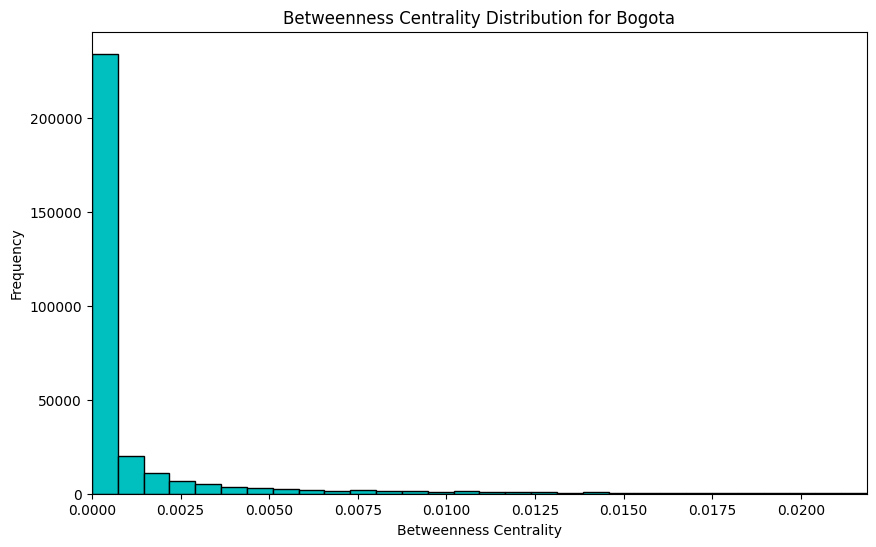

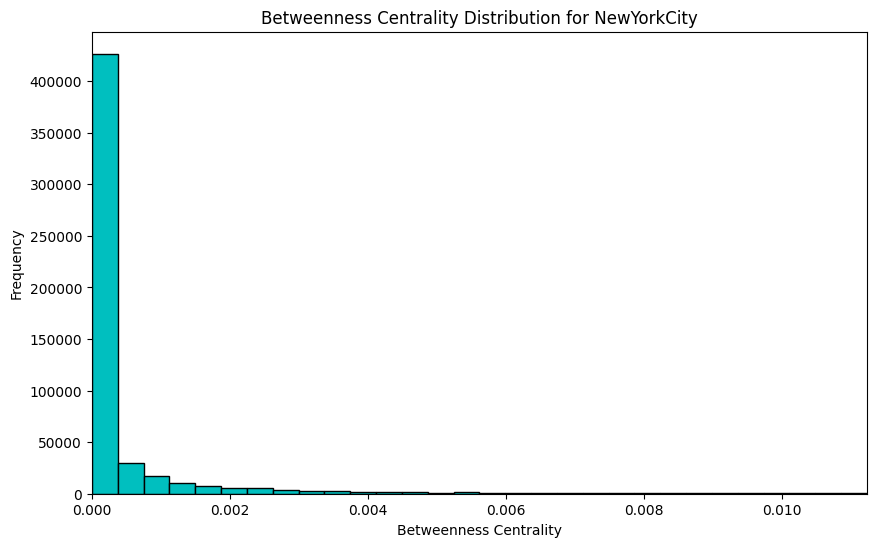

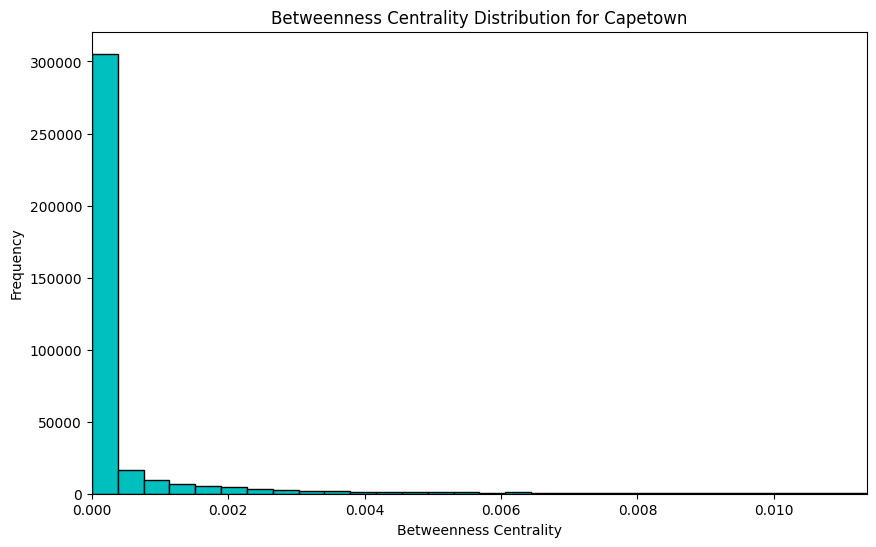

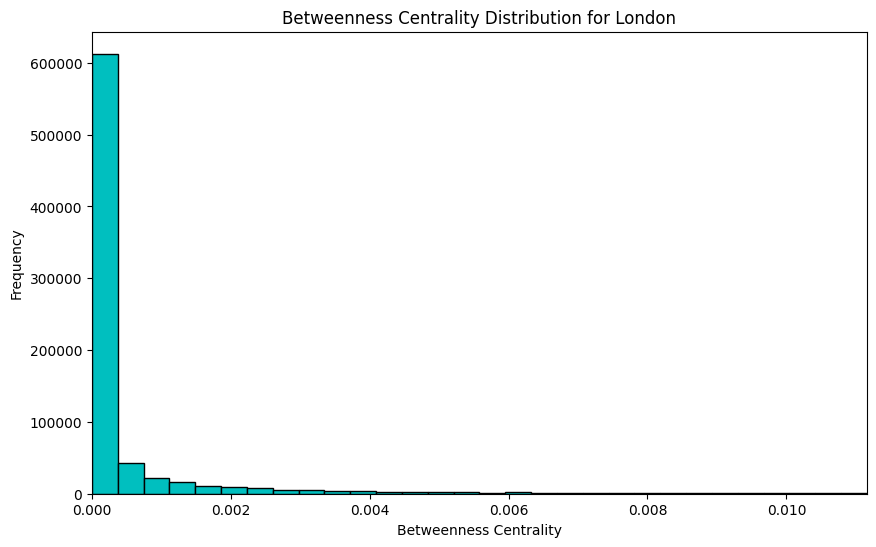

In [8]:
import os
import pickle
import matplotlib.pyplot as plt

def plot_histogram(city, bc_values):
    plt.figure(figsize=(10, 6))
    
    # Calculate 10 times the mean
    cutoff = 10 * np.mean(bc_values)
    
    # Plot the histogram with the adjusted range
    plt.hist([value for value in bc_values if value <= cutoff], bins=30, color='c', edgecolor='black', range=(0, cutoff))
    
    plt.title(f'Betweenness Centrality Distribution for {city}')
    plt.xlabel('Betweenness Centrality')
    plt.ylabel('Frequency')
    plt.xlim(0, cutoff)  # Setting the x-axis limit
    plt.show()

for city in rn_city_wise_tz_code.keys():
    pickle_file_path = os.path.join(config.BASE_FOLDER, config.network_folder, city + "_300_mean_betweenness_centrality.pkl")
    
    # Load the betweenness centrality values for the city from the pickle file
    with open(pickle_file_path, "rb") as f:
        bc_values = pickle.load(f)
    
    plot_histogram(city, list(bc_values.values()))


Processing London...


Iterations..: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 986.93it/s]

[0.015363745973315556, 0.015225853459575257, 0.015120143365536997, 0.014811569011138283, 0.014540717053279863]
[0.022974814049753954, 0.02337696794020967, 0.028327136524372697, 0.027956210655420987, 0.02770163951068473]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.00419312195584863, 0.004211904137061837, 0.004229903727391161, 0.004247168640564187, 0.012029846200700469]
[0.01671731516608073, 0.016577622693307495, 0.016443750740233146, 0.01631534294850877, 0.016192071468453372]
[0.18387391502969394, 0.18573777260829544, 0.19158820195252355, 0.1898881475335172, 0.18952506640948846]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.008275898597069663, 0.00831581073214773, 0.008354059861597542, 0.008390747802090221, 0.016090553778995983]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0041379492985348315, 0.004157905366073865, 0.004177029930798771, 0.0041953739010451106, 0.0042129841124815956]
[0.00419312195584863, 0.004211904137061837, 0.004229903727391161, 0.004247168640564187, 0.004263742957210291]
[0.008275898597069663, 0.00831581073214773, 

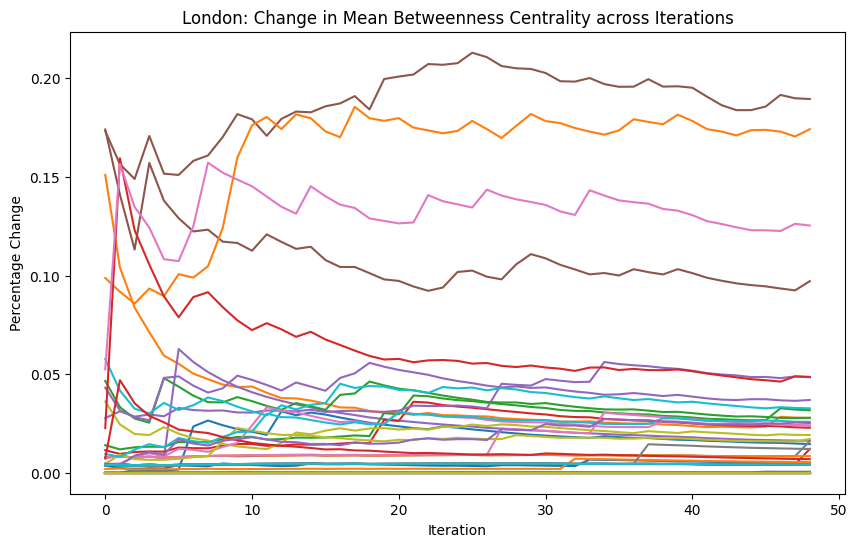

Finished processing all cities.
Processing London...


Iterations..: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 495.25it/s]

[0.0058381483622119215, 0.006074613671500619, 0.005951891984136479, 0.005833150839708812, 0.00573475880966438]
[0.0023732035001465365, 0.002322709808654057, 0.0022771028523733638, 0.0022340389142428045, 0.002403927581183599]
[0.007303966167540548, 0.007153258177364263, 0.007020248268496868, 0.006881796010974502, 0.007127932664674725]
[0.0067676825030825935, 0.006626482298214844, 0.006502161916570851, 0.006372289902210148, 0.006248748630683537]
[0.007253412847197447, 0.007602982650033201, 0.007453652660681616, 0.0073074580586356885, 0.0075513525230541]
[0.004068481528045994, 0.003984680176751588, 0.004468720437710299, 0.0043809162471471754, 0.004295250185463027]
[0.0034013698411052683, 0.003329000270017922, 0.003268725864824494, 0.0035617232187726117, 0.003500407959967825]
[0.00394163417855756, 0.004176176660337056, 0.004096700448597672, 0.004013094316993638, 0.003937515378152595]
[0.007485889957182085, 0.007330615611736027, 0.007193406169829154, 0.007049328001203677, 0.0069289675692983

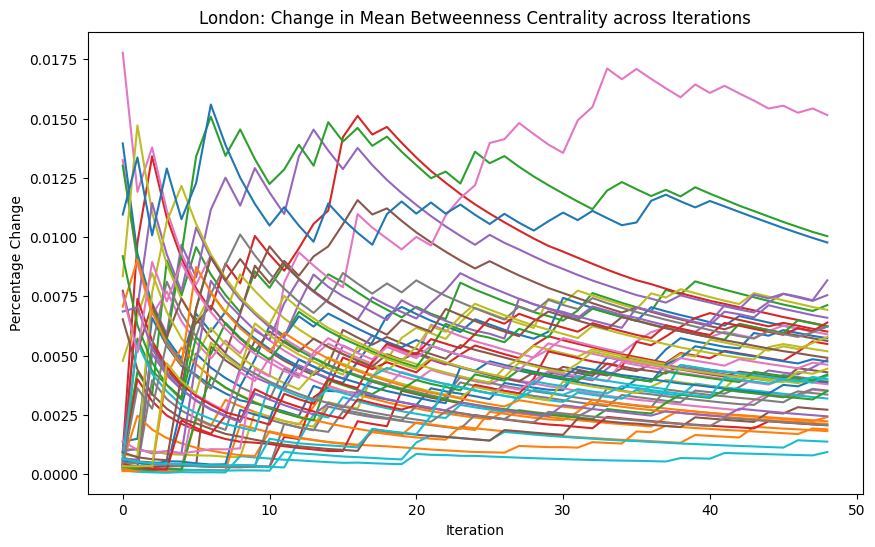

Finished processing all cities.
Processing London...


Iterations..: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 312.01it/s]

[0.0043095768426190985, 0.004427249357741505, 0.004335014996121891, 0.004417629639600566, 0.004497017097676366]
[0.0035264909739487547, 0.0034514592510987816, 0.0033795538500342235, 0.003496141797739276, 0.0034262189617844906]
[0.0054389092982411215, 0.005323187823810459, 0.005212288077481075, 0.005290188909692351, 0.005541829673882897]
[0.004616113652489441, 0.004742399152964134, 0.004643599170610715, 0.004750628233461294, 0.004810424510977186]
[0.0023036543869373732, 0.002254640463811046, 0.002207668787481649, 0.0021626143224310035, 0.0021193620359823834]
[0.005274507546541489, 0.005162283981721457, 0.0050547363987689265, 0.004951578513079764, 0.0050282773283094806]
[0.0029565640082817534, 0.0030618507917964583, 0.0031242546417321946, 0.0032065645346434084, 0.0031424332439505404]
[0.005864184743310566, 0.006282403920300324, 0.006432525894701314, 0.00630124985603394, 0.006175224858913261]
[0.0020583849532757846, 0.002014589528738002, 0.0019726189135559602, 0.0020943307619558757, 0.002

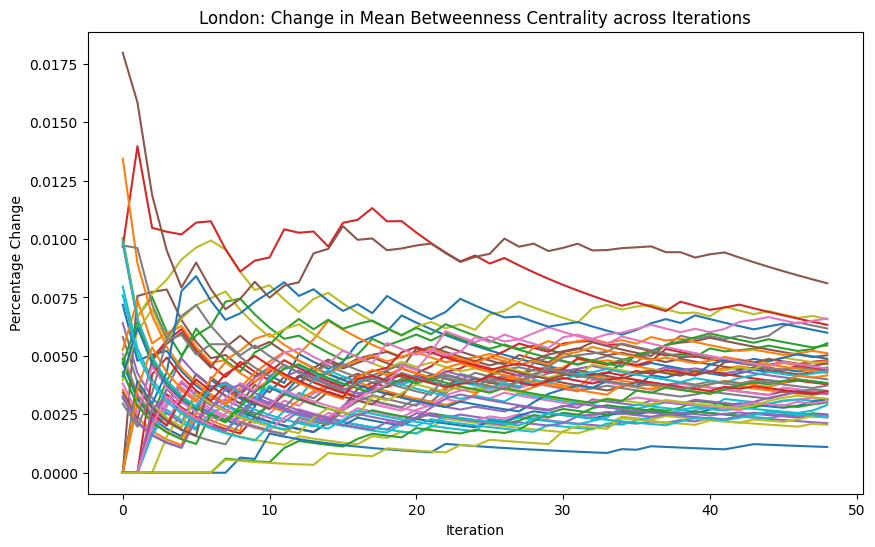

Finished processing all cities.
Processing London...


Iterations..: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 51.69it/s]


[0.004196127713402219, 0.004333339596134736, 0.004380550848263388, 0.004405226874299837, 0.004413280513162732]
[0.003909992826636335, 0.004038442826591839, 0.004089744515382568, 0.004161926977880953, 0.004078688438323334]
[0.002232236181398079, 0.0021847417945598225, 0.002139226340506493, 0.0020955686600879933, 0.0020536572868862335]
[0.0029821358855773093, 0.003020778582391805, 0.0029578456952586425, 0.0030124940392311575, 0.0030419611747925825]
[0.003383927100464097, 0.003311928651518052, 0.0035477565926046017, 0.003475353396837161, 0.0034058463289004175]
[0.0028537964460963595, 0.0027930773727751603, 0.0027348882608423442, 0.0027789905920374046, 0.0027234107801966567]
[0.004045167638149346, 0.0040858527096984745, 0.004000730778246423, 0.004255252371079699, 0.004266288516064324]
[0.0035063579083438588, 0.003560934126523739, 0.0036380915080149695, 0.003563844742545276, 0.003587151893505491]
[0.003765345895217828, 0.003781438124096011, 0.003846439190733258, 0.0037679404317387017, 0.003

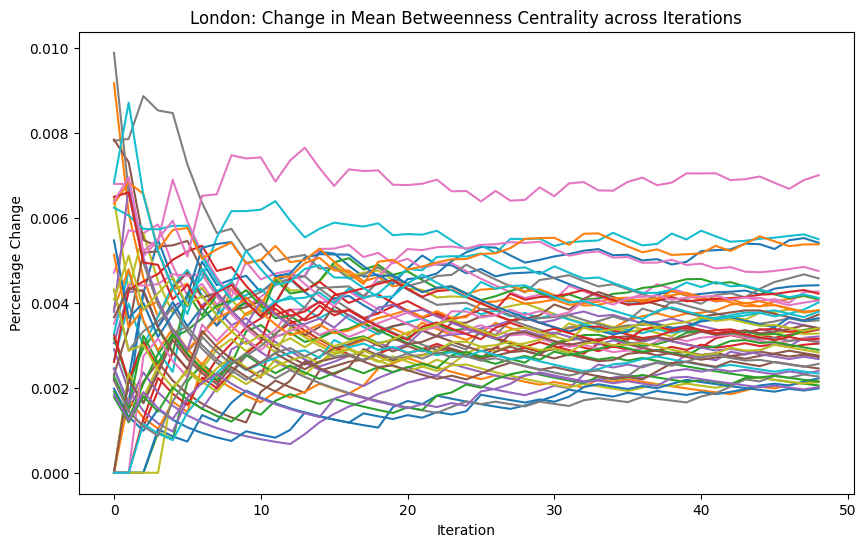

Finished processing all cities.
Processing London...


Iterations..: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 99.44it/s]


[0.004251219791176726, 0.004246314878307535, 0.004311300809725121, 0.004223315078914404, 0.004219551932664468]
[0.002769356652011637, 0.0028847443205523575, 0.0028246454805408504, 0.0028627341247949405, 0.0028054794422990416]
[0.004520787277821398, 0.004424600314463496, 0.004491097927820864, 0.0043994428680694175, 0.004389281901373566]
[0.0028209643819423276, 0.002760943863177597, 0.0027716046146955536, 0.0027939662180725654, 0.0028035400924319043]
[0.002694256017915673, 0.0028011642921424063, 0.0027428067027227727, 0.0026868310557284303, 0.0026330944346138617]
[0.003097728713544719, 0.0030959552153042025, 0.003031456148318698, 0.002969589696312194, 0.0029101979023859505]
[0.002797322085714844, 0.0027977786722632554, 0.002794351054733447, 0.002811267485057848, 0.00280770719597334]
[0.004174232656170249, 0.0041731984066616205, 0.004229741575928112, 0.004322495785970783, 0.004383248850806629]
[0.0029001979072684077, 0.0028384915688158883, 0.0028573459031336033, 0.0028746382700718326, 0.0

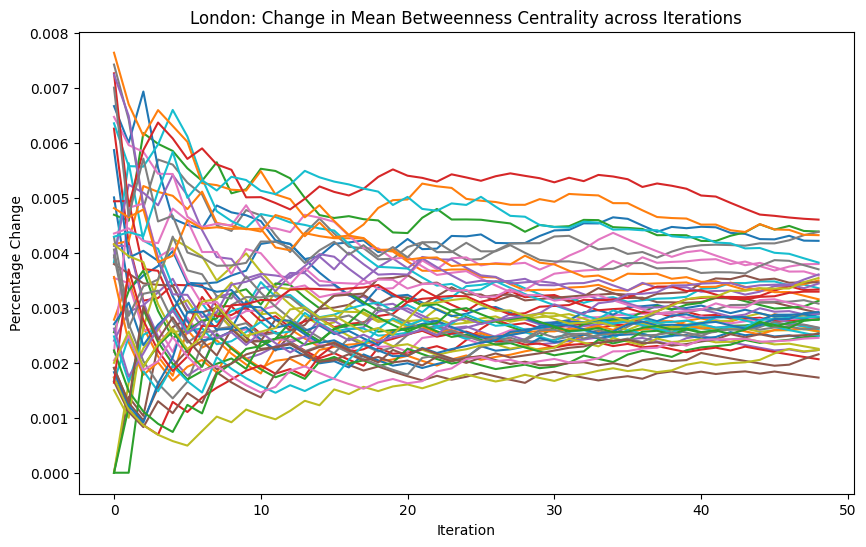

Finished processing all cities.


In [10]:
import copy
import os
import pickle
import time
import glob
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import sys

sys.path.append("../..")
import config
from urbanscales.io.road_network import RoadNetwork
from urbanscales.preprocessing.prep_network import Scale
from urbanscales.preprocessing.prep_speed import ScaleJF
from urbanscales.preprocessing.tile import Tile
import pandas as pd
from tqdm import tqdm

from smartprint import smartprint as sprint
from slugify import slugify

import networkx as nx
import matplotlib.pyplot as plt
import random
import tqdm
import pickle

# ER graph test betweenness convergence 

K = 2
iterations = 50
num_random_nodes = 50

ER_n = 200

for ER_p in np.arange(0.01, 0.5, 0.1):
    for city, _ in rn_city_wise_tz_code.items():
        print(f"Processing {city}...")
    
        G = nx.erdos_renyi_graph(ER_n, ER_p)
    
        initial_bc = nx.betweenness_centrality(G, k=K)
        all_nodes = list(initial_bc.keys())
        random_nodes = random.sample(list(initial_bc.keys()), num_random_nodes)
        
    
        # Dictionary to store the mean betweenness centrality values for each node up to each iteration
        mean_values_per_node = {node: [] for node in all_nodes}
    
        for i in tqdm.tqdm(range(iterations), desc="Iterations.."):
            bc = nx.betweenness_centrality(G, k=K)
            for node in all_nodes:
                if i == 0:
                    current_mean = bc[node]
                else:
                    current_mean = (mean_values_per_node[node][-1] * i + bc[node]) / (i + 1)
                mean_values_per_node[node].append(current_mean)
    
        # Compute the percentage change in mean values across iterations for each node
        percentage_changes_per_node = {node: [] for node in all_nodes}
        
        plt.figure(figsize=(10, 6))
        for node in random_nodes:
            mean_values = mean_values_per_node[node]
            percentage_changes = []
            for i in range(1, len(mean_values)):
                if mean_values[i-1] != 0:
                    percentage_change = ((mean_values[i] - mean_values[i-1]) / mean_values[i-1]) * 100
                else:
                    percentage_change = np.nan
    
                 
                percentage_changes.append(mean_values[i])
                if i == 10:
                    print ( mean_values[-5:])
            percentage_changes_per_node[node] = mean_values[i]
    
            # Plot the percentage change in mean values for the current node
     
            plt.plot(percentage_changes) # , label=f'Node {node}', marker='o')
    
        # plt.ylim(-100, 100)
        # plt.yscale("log")
        plt.xlabel('Iteration')
        plt.ylabel('Percentage Change')
        plt.title( city + ': Change in Mean Betweenness Centrality across Iterations')        
        plt.show()
    

    print("Finished processing all cities.")

Iterations: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.53it/s]
/var/folders/dp/q2rz500s2kj79pnbkf36h7ch0000gq/T/ipykernel_26530/820147796.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_mean_value), cmap=plt.cm.hot),


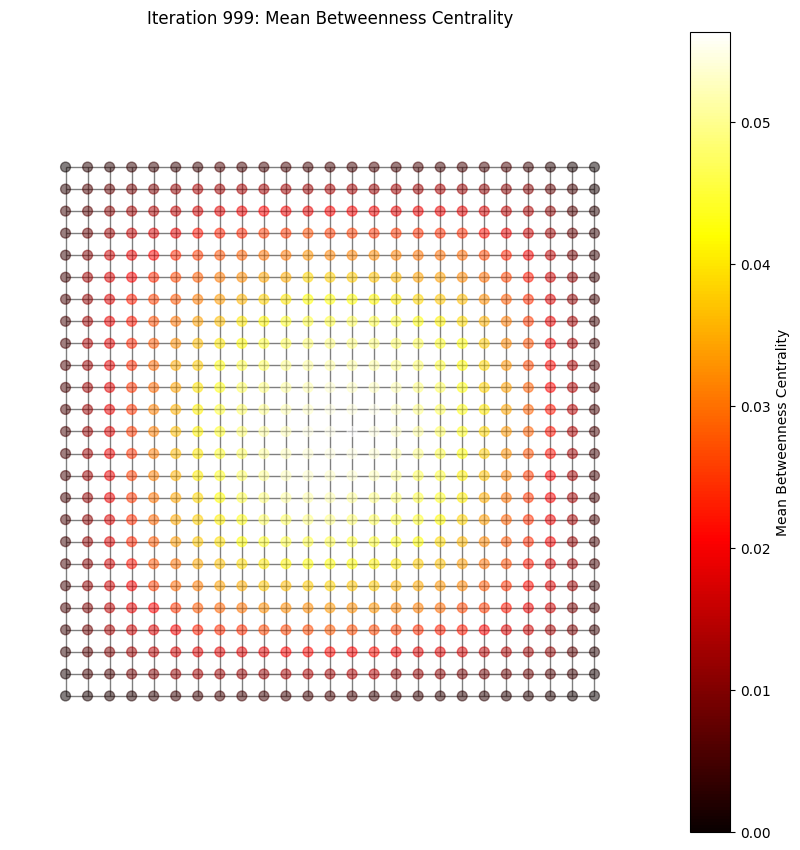

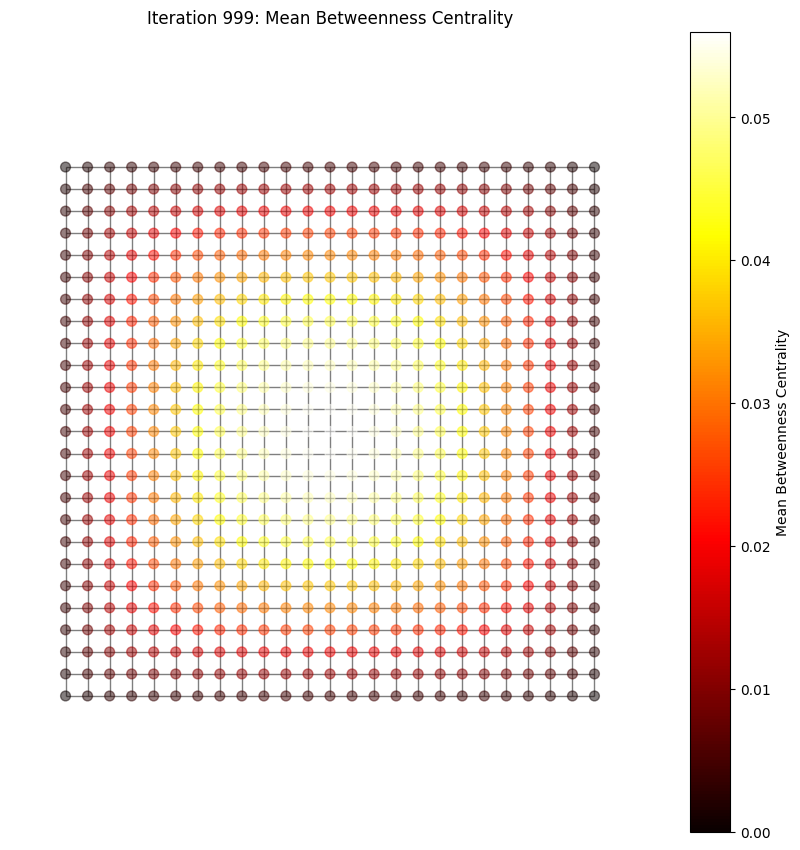

In [68]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from tqdm import tqdm

n, m = 25, 25  # Dimensions of the grid (n x m)
G = nx.grid_2d_graph(n, m, periodic=False)
pos = {(x, y): (x, y) for x, y in G.nodes()}  # Node positions

iterations = 1000  # Adjusted for demonstration purposes
K = 2

# Initialize storage for mean betweenness centrality values
mean_values_per_node = {node: [] for node in G.nodes()}

# Plotting function
def plot_graph(G, pos, mean_values, iteration):
    plt.figure(figsize=(8, 8))
    # Normalize mean values for color mapping
    max_mean_value = max(mean_values.values()) if mean_values else 1
    colors = [mean_values.get(node, 0) / max_mean_value for node in G.nodes()]
    nx.draw(G, pos, node_color=colors, with_labels=False, cmap=plt.cm.hot, node_size=50, edge_color='k', alpha=0.5)
    plt.title(f'Iteration {iteration}: Mean Betweenness Centrality')
    plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_mean_value), cmap=plt.cm.hot),
                 label='Mean Betweenness Centrality')
    plt.axis('equal')
    plt.show()

# Calculate and plot mean betweenness centrality
for i in tqdm(range(iterations), desc="Iterations"):
    bc = nx.betweenness_centrality(G, k=K, normalized=True)
    for node in G.nodes():
        current_mean = (mean_values_per_node[node][-1] * i + bc[node]) / (i + 1) if i > 0 else bc[node]
        mean_values_per_node[node].append(current_mean)
    
    # Plot the graph with current mean betweenness centrality values
    current_mean_values = {node: np.median(values) for node, values in mean_values_per_node.items()}

    # comment if plots not needed.
    # plot_graph(G, pos, current_mean_values, i)


plot_graph(G, pos, current_mean_values, i)

# Final:
bc = nx.betweenness_centrality(G, k=None, normalized=True)
current_mean_values = {node: values for node, values in bc.items()}
plot_graph(G, pos, current_mean_values, i)


Iterations: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.28it/s]
/var/folders/dp/q2rz500s2kj79pnbkf36h7ch0000gq/T/ipykernel_26530/1403878825.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_mean_value), cmap=plt.cm.hot),


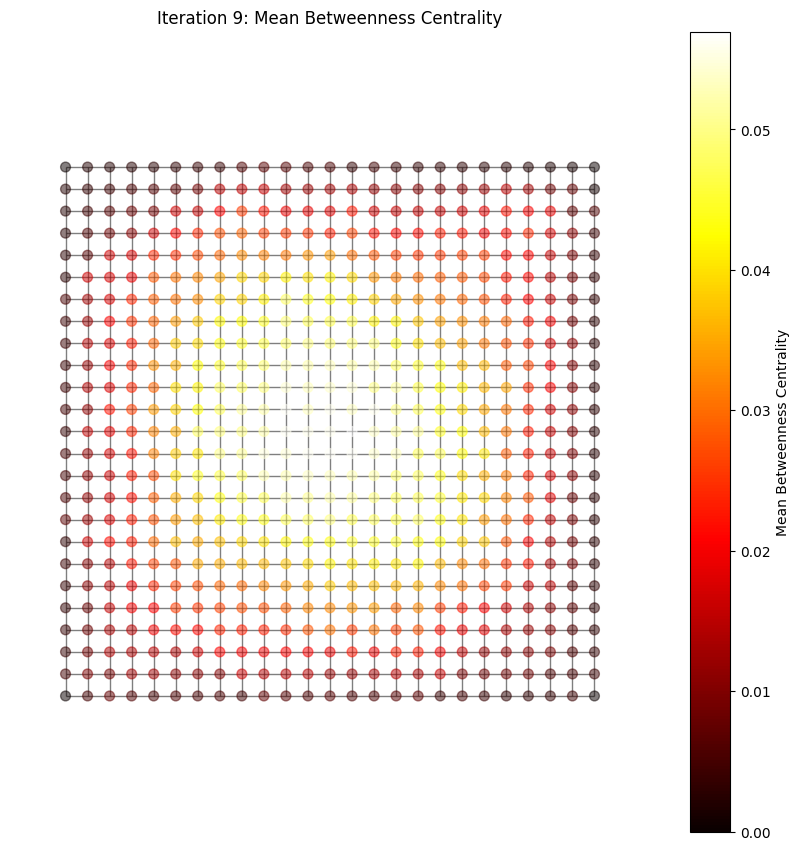

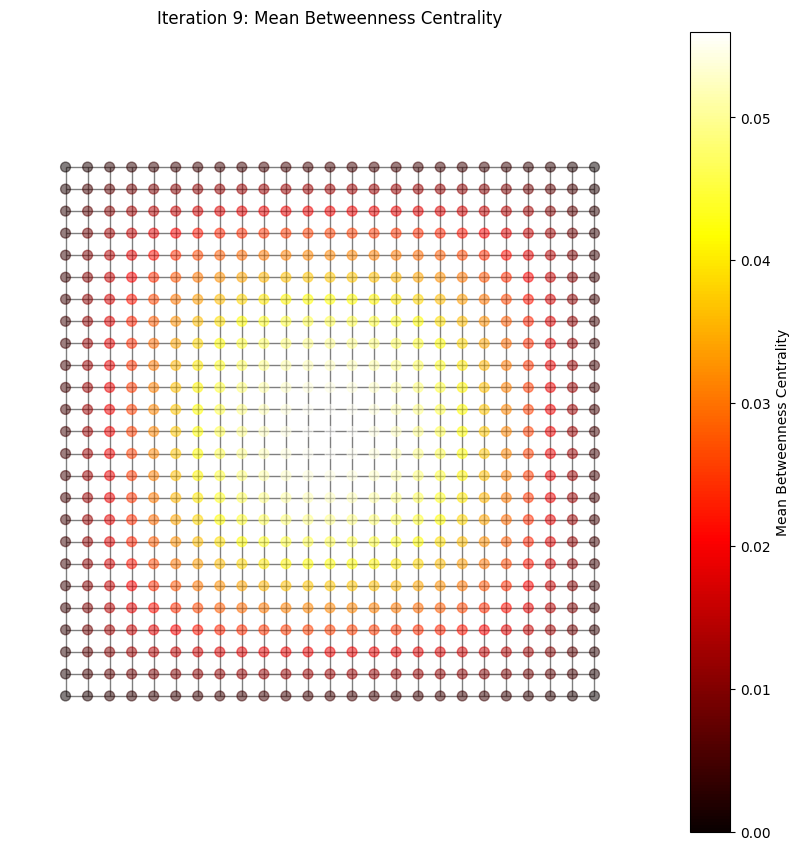

In [70]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from tqdm import tqdm

n, m = 25, 25  # Dimensions of the grid (n x m)
G = nx.grid_2d_graph(n, m, periodic=False)
pos = {(x, y): (x, y) for x, y in G.nodes()}  # Node positions

iterations = 10  # Adjusted for demonstration purposes
K = 20

# Initialize storage for mean betweenness centrality values
mean_values_per_node = {node: [] for node in G.nodes()}

# Plotting function
def plot_graph(G, pos, mean_values, iteration):
    plt.figure(figsize=(8, 8))
    # Normalize mean values for color mapping
    max_mean_value = max(mean_values.values()) if mean_values else 1
    colors = [mean_values.get(node, 0) / max_mean_value for node in G.nodes()]
    nx.draw(G, pos, node_color=colors, with_labels=False, cmap=plt.cm.hot, node_size=50, edge_color='k', alpha=0.5)
    plt.title(f'Iteration {iteration}: Mean Betweenness Centrality')
    plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_mean_value), cmap=plt.cm.hot),
                 label='Mean Betweenness Centrality')
    plt.axis('equal')
    plt.show()

# Calculate and plot mean betweenness centrality
for i in tqdm(range(iterations), desc="Iterations"):
    bc = nx.betweenness_centrality(G, k=K, normalized=True)
    for node in G.nodes():
        current_mean = (mean_values_per_node[node][-1] * i + bc[node]) / (i + 1) if i > 0 else bc[node]
        mean_values_per_node[node].append(current_mean)
    
    # Plot the graph with current mean betweenness centrality values
    current_mean_values = {node: np.median(values) for node, values in mean_values_per_node.items()}

    # comment if plots not needed.
    # plot_graph(G, pos, current_mean_values, i)


plot_graph(G, pos, current_mean_values, i)

# Final:
bc = nx.betweenness_centrality(G, k=None, normalized=True)
current_mean_values = {node: values for node, values in bc.items()}
plot_graph(G, pos, current_mean_values, i)


Iterations: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 38.60it/s]
/var/folders/dp/q2rz500s2kj79pnbkf36h7ch0000gq/T/ipykernel_6438/2521962089.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_mean_value), cmap=plt.cm.hot),


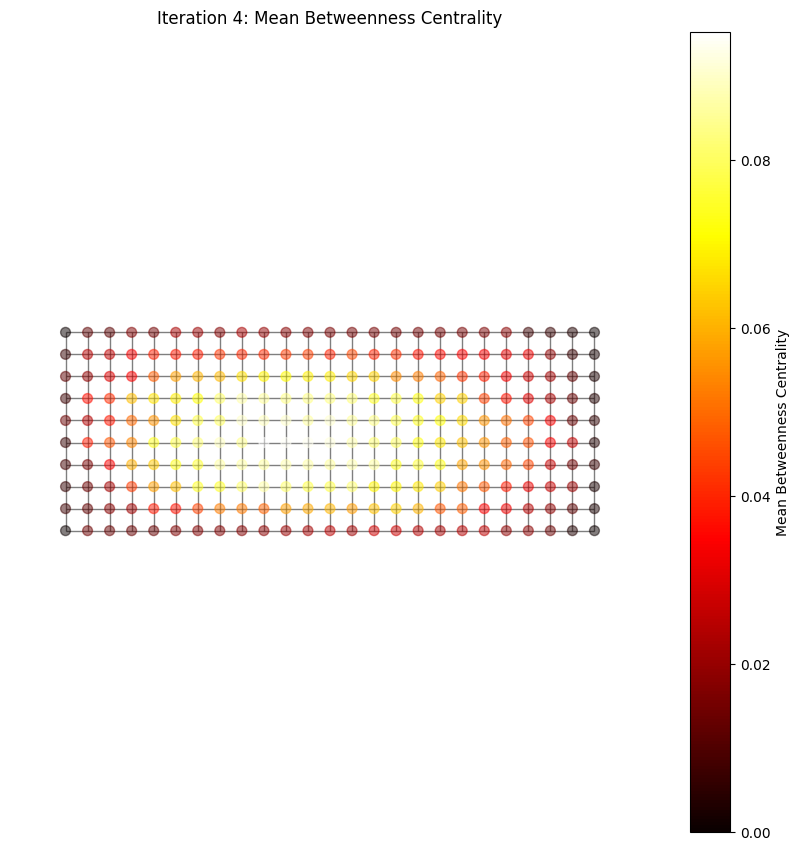

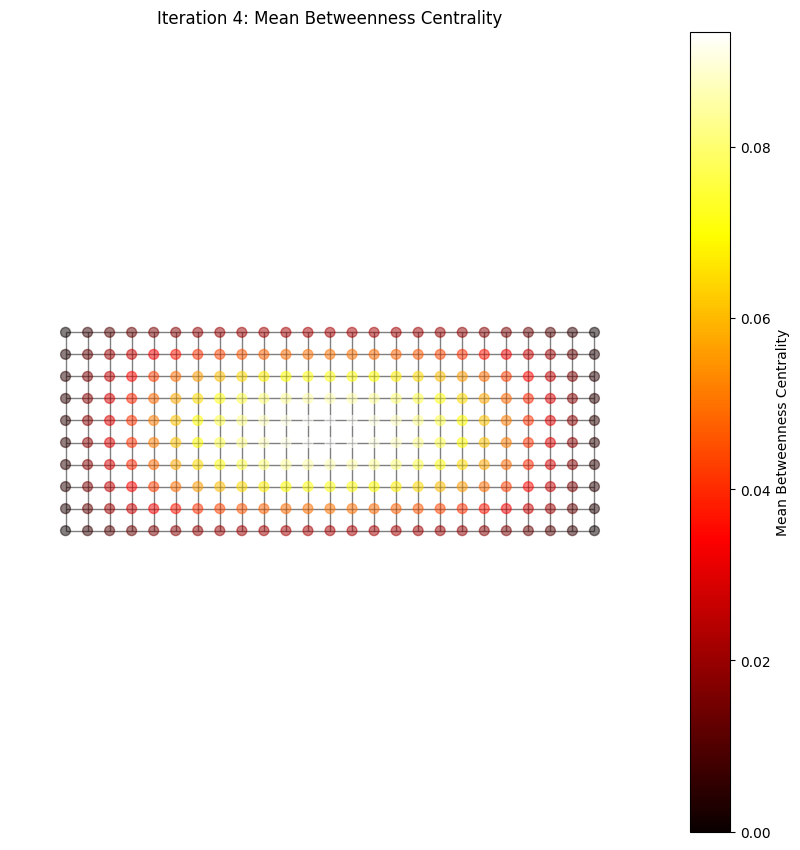

In [54]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from tqdm import tqdm

n, m = 25, 10  # Dimensions of the grid (n x m)
G = nx.grid_2d_graph(n, m, periodic=False)
pos = {(x, y): (x, y) for x, y in G.nodes()}  # Node positions

iterations = 5  # Adjusted for demonstration purposes
K = 20

# Initialize storage for mean betweenness centrality values
mean_values_per_node = {node: [] for node in G.nodes()}

# Plotting function
def plot_graph(G, pos, mean_values, iteration):
    plt.figure(figsize=(8, 8))
    # Normalize mean values for color mapping
    max_mean_value = max(mean_values.values()) if mean_values else 1
    colors = [mean_values.get(node, 0) / max_mean_value for node in G.nodes()]
    nx.draw(G, pos, node_color=colors, with_labels=False, cmap=plt.cm.hot, node_size=50, edge_color='k', alpha=0.5)
    plt.title(f'Iteration {iteration}: Mean Betweenness Centrality')
    plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_mean_value), cmap=plt.cm.hot),
                 label='Mean Betweenness Centrality')
    plt.axis('equal')
    plt.show()

# Calculate and plot mean betweenness centrality
for i in tqdm(range(iterations), desc="Iterations"):
    bc = nx.betweenness_centrality(G, k=min(K, G.__len__()), normalized=True)
    for node in G.nodes():
        current_mean = (mean_values_per_node[node][-1] * i + bc[node]) / (i + 1) if i > 0 else bc[node]
        mean_values_per_node[node].append(current_mean)
    
    # Plot the graph with current mean betweenness centrality values
    current_mean_values = {node: np.median(values) for node, values in mean_values_per_node.items()}

    # comment if plots not needed.
    # plot_graph(G, pos, current_mean_values, i)


plot_graph(G, pos, current_mean_values, i)

# Final:
bc = nx.betweenness_centrality(G, k=None, normalized=True)
current_mean_values = {node: values for node, values in bc.items()}
plot_graph(G, pos, current_mean_values, i)


Iterations: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.75it/s]
/var/folders/dp/q2rz500s2kj79pnbkf36h7ch0000gq/T/ipykernel_6438/3628551577.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_mean_value), cmap=plt.cm.hot),


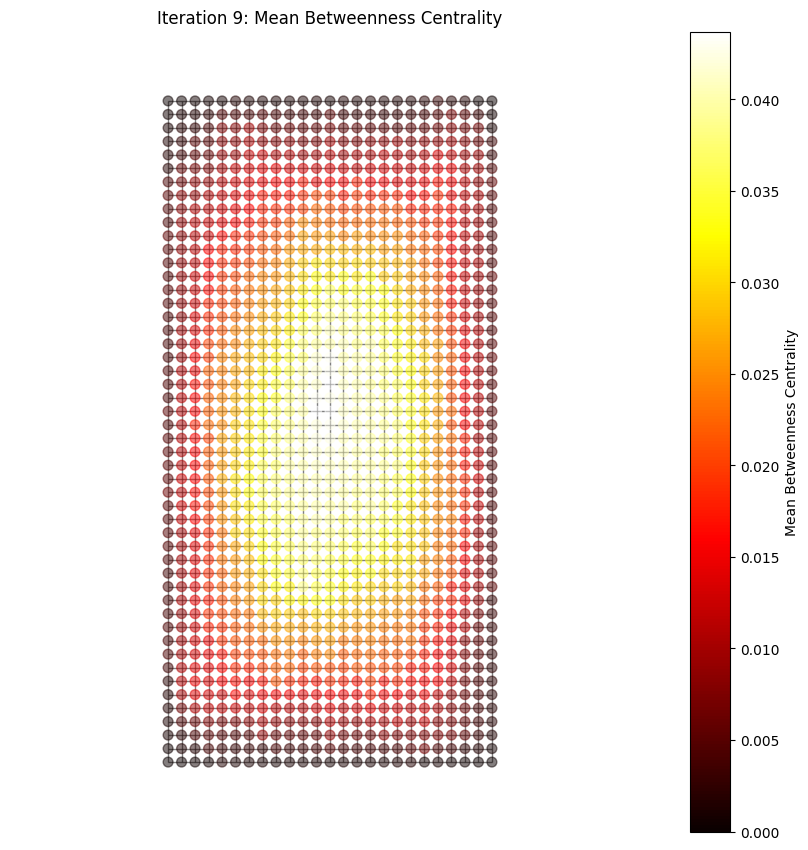

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from tqdm import tqdm

n, m = 25, 50  # Dimensions of the grid (n x m)
G = nx.grid_2d_graph(n, m, periodic=False)
pos = {(x, y): (x, y) for x, y in G.nodes()}  # Node positions

iterations = 100  # Adjusted for demonstration purposes
K = 1

# Initialize storage for mean betweenness centrality values
mean_values_per_node = {node: [] for node in G.nodes()}

# Plotting function
def plot_graph(G, pos, mean_values, iteration):
    plt.figure(figsize=(8, 8))
    # Normalize mean values for color mapping
    max_mean_value = max(mean_values.values()) if mean_values else 1
    colors = [mean_values.get(node, 0) / max_mean_value for node in G.nodes()]
    nx.draw(G, pos, node_color=colors, with_labels=False, cmap=plt.cm.hot, node_size=50, edge_color='k', alpha=0.5)
    plt.title(f'Iteration {iteration}: Mean Betweenness Centrality')
    plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_mean_value), cmap=plt.cm.hot),
                 label='Mean Betweenness Centrality')
    plt.axis('equal')
    plt.show()

# Calculate and plot mean betweenness centrality
for i in tqdm(range(iterations), desc="Iterations"):
    bc = nx.betweenness_centrality(G, k=min(K, G.__len__()), normalized=True)
    for node in G.nodes():
        current_mean = (mean_values_per_node[node][-1] * i + bc[node]) / (i + 1) if i > 0 else bc[node]
        mean_values_per_node[node].append(current_mean)
    
    # Plot the graph with current mean betweenness centrality values
    current_mean_values = {node: np.median(values) for node, values in mean_values_per_node.items()}

    # comment if plots not needed.
    # plot_graph(G, pos, current_mean_values, i)


plot_graph(G, pos, current_mean_values, i)

# Final:
bc = nx.betweenness_centrality(G, k=None, normalized=True)
current_mean_values = {node: values for node, values in bc.items()}
plot_graph(G, pos, current_mean_values, i)


In [35]:
true_bc = nx.betweenness_centrality(G, k=None, normalized=True)

n, m = 25, 50  # Dimensions of the grid (n x m)
G = nx.grid_2d_graph(n, m, periodic=False)
pos = {(x, y): (x, y) for x, y in G.nodes()}  # Node positions

range_of_k_values = range(1, 50, 5)
range_of_iterations = range(2, 100, 10)
errors = {}  # To store errors for each (k, iteration) pair

for k in tqdm(range_of_k_values, desc="k "):
    for iteration in tqdm(range_of_iterations, desc="iterations: "):
        
        # Initialize storage for mean betweenness centrality values
        mean_values_per_node = {node: [] for node in G.nodes()}
        
        # Plotting function
        def plot_graph(G, pos, mean_values, iteration):
            plt.figure(figsize=(8, 8))
            # Normalize mean values for color mapping
            max_mean_value = max(mean_values.values()) if mean_values else 1
            colors = [mean_values.get(node, 0) / max_mean_value for node in G.nodes()]
            nx.draw(G, pos, node_color=colors, with_labels=False, cmap=plt.cm.hot, node_size=50, edge_color='k', alpha=0.5)
            plt.title(f'Iteration {iteration}: Mean Betweenness Centrality')
            plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_mean_value), cmap=plt.cm.hot),
                         label='Mean Betweenness Centrality')
            plt.axis('equal')
            plt.show()
        
        # Calculate and plot mean betweenness centrality
        for i in (range(iteration)):
            bc = nx.betweenness_centrality(G, k=min(K, G.__len__()), normalized=True)
            for node in G.nodes():
                current_mean = (mean_values_per_node[node][-1] * i + bc[node]) / (i + 1) if i > 0 else bc[node]
                mean_values_per_node[node].append(current_mean)
            
            # Plot the graph with current mean betweenness centrality values
            current_mean_values = {node: np.median(values) for node, values in mean_values_per_node.items()}
        
            # comment if plots not needed.
            # plot_graph(G, pos, current_mean_values, i)
        
        # plot_graph(G, pos, current_mean_values, i)

        error_sum = sum(abs(true_bc[node] - current_mean_values[node]) for node in G.nodes())
        errors[(k, iteration)] = error_sum

k : 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [18:51<00:00, 113.18s/it]


In [3]:
import copy
import os
import pickle
import time
import glob
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import sys

sys.path.append("../..")
import config
from urbanscales.io.road_network import RoadNetwork
from urbanscales.preprocessing.prep_network import Scale
from urbanscales.preprocessing.prep_speed import ScaleJF
from urbanscales.preprocessing.tile import Tile
import pandas as pd
from tqdm import tqdm

from smartprint import smartprint as sprint
from slugify import slugify

import networkx as nx
import matplotlib.pyplot as plt
import random
import tqdm
import pickle

n, m = 25, 50  # Dimensions of the grid (n x m)
G = nx.grid_2d_graph(n, m, periodic=False)
pos = {(x, y): (x, y) for x, y in G.nodes()}  # Node positions


true_bc = nx.betweenness_centrality(G, k=None, normalized=True)


range_of_k_values = [2, 3, 10, 20] #  range(1, 50, 5)
range_of_iterations = [10, 30, 50] #range(2, 100, 10)
errors = {}  # To store errors for each (k, iteration) pair

for k in tqdm.tqdm(range_of_k_values, desc="k "):
    for iteration in tqdm.tqdm(range_of_iterations, desc="iterations: "):
        
        # Initialize storage for mean betweenness centrality values
        mean_values_per_node = {node: [] for node in G.nodes()}
        
        # Plotting function
        def plot_graph(G, pos, mean_values, iteration):
            plt.figure(figsize=(8, 8))
            # Normalize mean values for colour mapping
            max_mean_value = max(mean_values.values()) if mean_values else 1
            colors = [mean_values.get(node, 0) / max_mean_value for node in G.nodes()]
            nx.draw(G, pos, node_color=colors, with_labels=False, cmap=plt.cm.hot, node_size=50, edge_color='k', alpha=0.5)
            plt.title(f'Iteration {iteration}: Mean Betweenness Centrality')
            plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_mean_value), cmap=plt.cm.hot),
                         label='Mean Betweenness Centrality')
            plt.axis('equal')
            plt.show()
        
        # Calculate and plot mean betweenness centrality
        for i in (range(iteration)):
            bc = nx.betweenness_centrality(G, k=min(K, G.__len__()), normalized=True)
            for node in G.nodes():
                current_mean = (mean_values_per_node[node][-1] * i + bc[node]) / (i + 1) if i > 0 else bc[node]
                mean_values_per_node[node].append(current_mean)
            
            # Plot the graph with current mean betweenness centrality values
            current_mean_values = {node: np.mean(values) for node, values in mean_values_per_node.items()}
        
            # comment if plots not needed.
            # plot_graph(G, pos, current_mean_values, i)
        
        # plot_graph(G, pos, current_mean_values, i)

        error_sum = np.mean([abs(true_bc[node] - current_mean_values[node]) * 100/true_bc[node] for node in G.nodes()])
        errors[(k, iteration)] = error_sum

k :   0%|                                                                                                                                                                                                         | 0/4 [00:00<?, ?it/s]


NameError: name 'K' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize an array to store errors, with dimensions based on the ranges of k and iterations
errors_matrix = np.zeros((len(range_of_iterations), len(range_of_k_values)))

# Assume errors is a dictionary with (k, iteration) as keys and calculated error as values
# You need to fill errors_matrix with the actual errors calculated from your data
for i, iteration in enumerate(range_of_iterations):
    for j, k in enumerate(range_of_k_values):
        errors_matrix[i, j] = errors[(k, iteration)]  # Assuming errors is already calculated


# Plotting
fig, ax = plt.subplots()
cax = ax.imshow(errors_matrix, cmap='RdYlGn_r', origin='lower', aspect='auto',
                extent=[min(range_of_k_values), max(range_of_k_values), 
                        min(range_of_iterations), max(range_of_iterations)])

ax.set_xlabel('K Value')
ax.set_ylabel('Iterations')
ax.set_title('Error Heatmap')
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Error')

plt.show()
######### MEAN PLOT #########

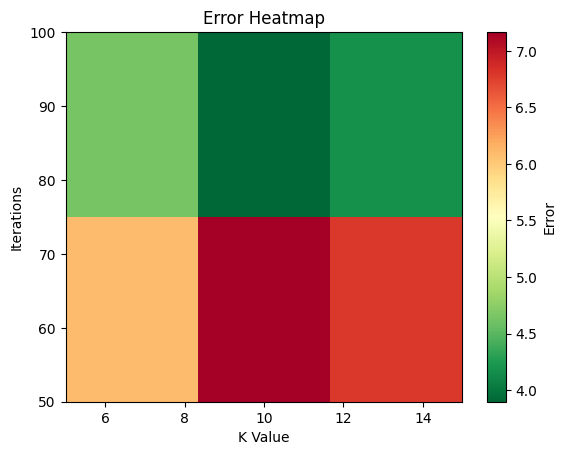

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize an array to store errors, with dimensions based on the ranges of k and iterations
errors_matrix = np.zeros((len(range_of_iterations), len(range_of_k_values)))

# Assume errors is a dictionary with (k, iteration) as keys and calculated error as values
# You need to fill errors_matrix with the actual errors calculated from your data
for i, iteration in enumerate(range_of_iterations):
    for j, k in enumerate(range_of_k_values):
        errors_matrix[i, j] = errors[(k, iteration)]  # Assuming errors is already calculated

# Plotting
fig, ax = plt.subplots()
cax = ax.imshow(errors_matrix, cmap='RdYlGn_r', origin='lower', aspect='auto',
                extent=[min(range_of_k_values), max(range_of_k_values), 
                        min(range_of_iterations), max(range_of_iterations)])

ax.set_xlabel('K Value')
ax.set_ylabel('Iterations')
ax.set_title('Error Heatmap')
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Error')

plt.show()
######### MEAN PLOT #########

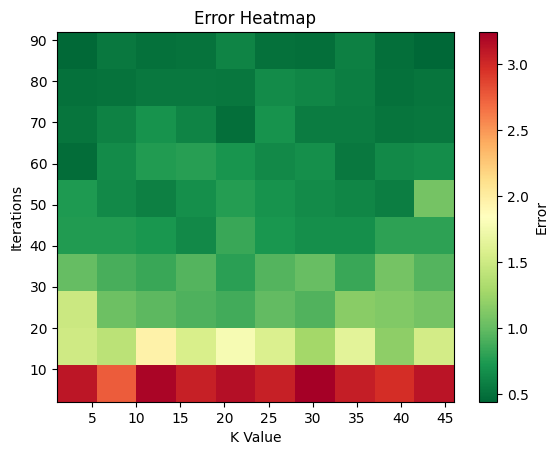

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize an array to store errors, with dimensions based on the ranges of k and iterations
errors_matrix = np.zeros((len(range_of_iterations), len(range_of_k_values)))

# Assume errors is a dictionary with (k, iteration) as keys and calculated error as values
# You need to fill errors_matrix with the actual errors calculated from your data
for i, iteration in enumerate(range_of_iterations):
    for j, k in enumerate(range_of_k_values):
        errors_matrix[i, j] = errors[(k, iteration)]  # Assuming errors is already calculated

# Plotting
fig, ax = plt.subplots()
cax = ax.imshow(errors_matrix, cmap='RdYlGn_r', origin='lower', aspect='auto',
                extent=[min(range_of_k_values), max(range_of_k_values), 
                        min(range_of_iterations), max(range_of_iterations)])

ax.set_xlabel('K Value')
ax.set_ylabel('Iterations')
ax.set_title('Error Heatmap')
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Error')

plt.show()
######### MEDIAN PLOT #########